# OHP Atmospheric Profile

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : April 28th 2017
- update :



This notebook provide the atmospheric profile for OHP taken from LibRandTran version 2.0.1 for **afglus** atmosphere

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import re
import pandas as pd

In [18]:
from astropy.constants import N_A

In [19]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [20]:
atmprofile_ascii_file='libradtran_data/UVSPEC_OHP_atmprof_verbose cut.txt'

lc |  z[km]  |  Pressure  | Temp.  |    Air      |   Ozone     |     O2      | Water vap.  |    CO2      |    NO2      |      O4      |
     |         |   [hPa]    |  [K]   |   [cm-3]    |   [cm-3]    |   [cm-3]    |   [cm-3]    |   [cm-3]    |   [cm-3]    | [1.0e+46cm-6]|

In [21]:
data_table=np.loadtxt(atmprofile_ascii_file)

In [22]:
NbLayers=data_table.shape[0]
GroundData_OHP=data_table[NbLayers-1,:]

In [23]:
num=data_table[:,0]
z=data_table[:,1]
Pressure=data_table[:,2]     # hPa
Temperature=data_table[:,3]  # K 
AirDensity=data_table[:,4]   # cm-3
O3Density=data_table[:,5]    # cm-3
O2Density=data_table[:,6]    # cm-3
PWVDensity=data_table[:,7]      # cm-3
CO2Density=data_table[:,8]   # cm-3
NO2Density=data_table[:,9]   # cm-3
O4Density=data_table[:,10]   # cm-3

In [24]:
Pressure_Ground=GroundData_OHP[2]     # hPa
Temperature_Ground=GroundData_OHP[3]  # K 
AirDensity_Ground=GroundData_OHP[4]   # cm-3
O3Density_Ground=GroundData_OHP[5]    # cm-3
O2Density_Ground=GroundData_OHP[6]    # cm-3
PWVDensity_Ground=GroundData_OHP[7]      # cm-3
CO2Density_Ground=GroundData_OHP[8]   # cm-3
NO2Density_Ground=GroundData_OHP[9]   # cm-3
O4Density_Ground=GroundData_OHP[10]   # cm-3

In [48]:
print 'Pressure_Ground = ', Pressure_Ground,'hPa'
print 'Temperature_Ground = ', Temperature_Ground,'°K'
print 'Pressure_Ground = ', Pressure_Ground,'hPa'
print 'Air_Density_Ground = ', AirDensity_Ground,' cm-3'
print 'O3_Density_Ground = ', O3Density_Ground,' cm-3'
print 'O2_Density_Ground = ', O2Density_Ground,' cm-3'
print 'PWV_Density_Ground = ', PWVDensity_Ground,' cm-3'
print 'CO2_Density_Ground = ', CO2Density_Ground,' cm-3'
print 'NO2_Density_Ground = ', NO2Density_Ground,' cm-3'

Pressure_Ground =  937.22595 hPa
Temperature_Ground =  283.98 °K
Pressure_Ground =  937.22595 hPa
Air_Density_Ground =  2.39057e+19  cm-3
O3_Density_Ground =  678599000000.0  cm-3
O2_Density_Ground =  5.00069e+18  cm-3
PWV_Density_Ground =  5.88009e+16  cm-3
CO2_Density_Ground =  7.89583e+15  cm-3
NO2_Density_Ground =  550316000.0  cm-3


In [33]:
Molar_Mass_Air= 28.965338 # g·mol-1

In [40]:
Air_Mass_Density=Molar_Mass_Air*AirDensity_Ground/N_A

In [44]:
# Donc on a vérifié que les unités de densité de libradtran sont bien des molécules par cm3
print 'Air_Mass_Density = ',Air_Mass_Density,'g/cm3'

Air_Mass_Density =  0.00114981805853 mol g/cm3


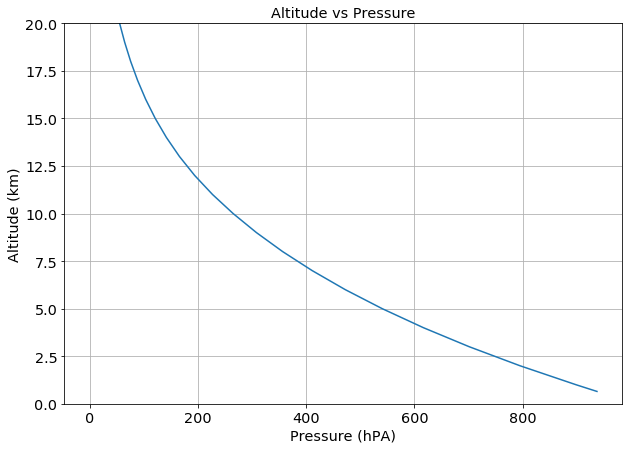

In [49]:
plt.plot(Pressure,z)
plt.title('Altitude vs Pressure')
plt.xlabel('Pressure (hPA)')
plt.ylabel('Altitude (km)')
plt.ylim(0.,20.)
plt.grid(True)

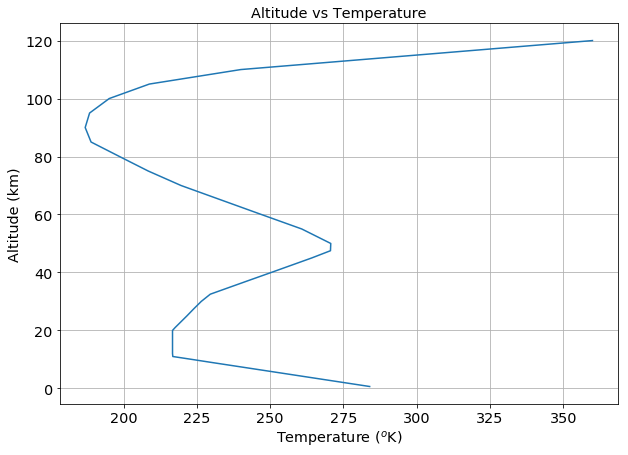

In [42]:
plt.plot(Temperature,z)
plt.title('Altitude vs Temperature')
plt.xlabel('Temperature ($^o$K)')
plt.ylabel('Altitude (km)')
plt.grid(True)

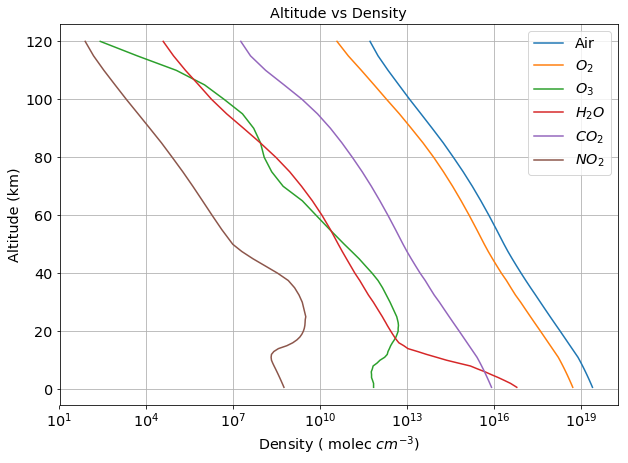

In [27]:
plt.semilogx(AirDensity,z ,label='Air')
plt.semilogx(O2Density,z ,label='$O_2$')
plt.semilogx(O3Density,z ,label='$O_3$')
plt.semilogx(PWVDensity,z ,label='$H_2O$')
plt.semilogx(CO2Density,z ,label='$CO_2$')
plt.semilogx(NO2Density,z ,label='$NO_2$')
plt.title('Altitude vs Density')
plt.xlabel('Density ( molec $cm^{-3}$)')
plt.ylabel('Altitude (km)')
plt.legend(loc='best')
plt.grid(True)